# 模块导入

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 



In [61]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [62]:
# 显示所有行
pd.set_option("display.max_rows", None)
# 显示所有列
pd.set_option("display.max_columns", None)
# 保留小数点后几位
pd.set_option('precision', 0)
#取消科学计数法
pd.set_option("display.float_format", lambda x: "%.1f" % x)



# 公用方法

## 画图公用方法

In [63]:
def data_plt(index_ls,
             violin_list,
             boxplot_list,
             violin_color={'color': '#FFF', 'facecolor': '#FFC700'},
             box_color={'color': '#FFC700', 'facecolor': '#FFC700'},
             violin_alpha=0.4):
    # 画布大小
    plt.figure(figsize=(15, 7))

    # 解决中文乱码
    plt.rcParams['font.sans-serif'] = ['SimHei']

    # 用来正常显示负号
    plt.rcParams['axes.unicode_minus'] = False

    # 图标标签
    # plt.title('彭水英语学科两个班级箱线图+小提琴图',fontsize=20)

    # XY轴标签
    plt.xlabel('学科')
    plt.ylabel('分数')

    # 刻度字体大小
    plt.tick_params(labelsize=14)

    # Y轴最大值和最小值
    plt.ylim(ymin=0, ymax=101)

    # 绘制小提琴图
    for i in violin_list:
        violin = plt.violinplot(
            # dataset：数据集，如果有多个数据集，应该转换为list形式
            dataset=i,
            # vert：是否要垂直放置
            vert=True,
            # widths：图形最大宽度
            widths=0.6,
            # showmeans：是否显示均值点
            showmeans=False,
            # showextrema：是否显示数据极限值
            showextrema=False,
            # quantiles：列表类型，列表元素在0到1之间，表示显示这些n分点
            quantiles=None)

        # 设置 小提琴图的颜色，set_facecolor填充颜色，set_edgecolor边框颜色
        for patch in violin['bodies']:
            patch.set_facecolor(violin_color['facecolor'])
            patch.set_edgecolor(violin_color['color'])
            patch.set_alpha(violin_alpha)

    # 绘制箱线图
    bplot = plt.boxplot(
        # x 指定要绘制箱线图的数据
        x=boxplot_list,
        # 是否需要将箱线图垂直摆放
        vert=None,
        # 设置中位线处凹陷
        notch=False,
        # 为箱线图添加标签
        labels=index_ls,
        # patch_artist 是否填充箱体的颜色；
        patch_artist=True,
        # showmeans是否显示均值
        showmeans=True,
        # meanline是否用线的形式表示均值
        meanline=False,
        # widths指定箱线图的宽度
        widths=0.3,
        # showcaps是否显示箱线图顶端和末端的两条线
        showcaps=True,
        # boxprops：color箱体边框色，facecolor箱体填充色；
        boxprops=box_color,
        # 须的颜色
        whiskerprops={'color': '#B8B8B8'},
        # 顶端末端线
        capprops={'color': '#B8B8B8'},
        # 中位线颜色
        medianprops={'color': 'red'},
        # 设置均值
        meanprops={"marker": "D",
                   "markerfacecolor": "white", "color": "white"},
        # 设置异常值属性，点的形状、填充色和边框色
        flierprops={"marker": "o", "markerfacecolor": "#FF8A70",
                    "markeredgecolor": "white"},


    )

    return violin, bplot

## 读文件公用方法

In [13]:
# 文件读取公用方法

def read_file(file_path,sheet_name,index_col=0):
    
    # 
    data = pd.DataFrame(pd.read_excel(file_path,sheet_name=sheet_name,index_col=0))
    
    #行列翻转
    data_reversal = pd.DataFrame(data.values.T, index=data.columns, columns=data.index)

    
    return data ,data_reversal


# 测试数据

## 测试

In [ ]:
data_test = pd.DataFrame(pd.read_excel('C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls',sheet_name='英语'))


# boxplot 数据

# 第一列数据删除nan值 
column_data_1 = data_test.iloc[:,1:2].dropna(axis=0,how = 'any')


# 第二列数据删除nan值
column_data_2 = data_test.iloc[:,2:3].dropna(axis=0,how = 'any')

# 取列名称专程列表
data_test.columns[1:9].tolist()


# voilin 数据
test_data = [0]
column_data_1_test = pd.DataFrame(test_data)
column_data_2_test = pd.DataFrame(test_data)

data_1 = pd.concat([column_data_1,column_data_1_test],axis=1).fillna(0)

data_2 = pd.concat([column_data_2_test,column_data_2],axis=1).fillna(0)

index_ls = ['语文9月','语文10月']


## 演示

In [7]:
# 准备数据
# violin图数据准备 ，data_reversal
yw9_data, yw9_data_reversal = read_file(
    file_path='C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls', sheet_name='语文9')
yw10_data, yw10_data_reversal = read_file(
    file_path='C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls', sheet_name='语文10')


#  boxplot 数据准备
yw9_data = yw9_data['语文9月']
yw10_data = yw10_data['语文10月']


index_ls = yw9_data_reversal.index.to_list()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-10月年级统练成绩汇总.xls'

In [8]:
#调 生成图方法

data_plt(index_ls=index_ls,
         violin_list=[yw9_data_reversal, yw10_data_reversal],
         boxplot_list=[yw9_data, yw10_data],
        )
print()

NameError: name 'index_ls' is not defined

In [17]:
excel_data1,excel_data2 = read_file(file_path = 'C:\\Users\\caozhiqiang\\Desktop\\数据分析\\初三年级-【2018-2019学年第一学期初一年级期中考试】.xls',sheet_name='Sheet1')
excel_data1

,准考证号,班级,语文,数学,英语,生物,政治,历史,地理,总分
学籍号,,,,,,,,,,
1811028,86489468,七年级10班(东校区),89.5,95,92.5,91,83.0,93,88,632.0
1811038,86532082,七年级10班(东校区),83.0,89,83.0,94,88.0,94,82,613.0
1811032,88300255,七年级10班(东校区),81.5,95,90.5,98,84.0,79,85,613.0
1811027,86532538,七年级10班(东校区),83.0,88,96.5,93,83.0,86,77,606.5
1811018,86489450,七年级10班(东校区),74.0,96,75.5,94,80.0,94,83,596.5
1811011,86469207,七年级10班(东校区),79.5,95,79.5,87,80.0,96,75,592.0
1811003,88300082,七年级10班(东校区),76.0,92,90.0,76,88.0,93,77,592.0
1811020,86469570,七年级10班(东校区),83.5,82,94.0,81,79.0,96,74,589.5
1811036,86469010,七年级10班(东校区),87.0,87,85.0,93,80.0,90,65,587.0


In [18]:
#总分分数线
total_score1 = 600
#语文分数线
yw_score1 = 90
#数学分数线
ss_score1 = 95


#总分分数线
total_score2 = 500
#语文分数线
yw_score2 = 80
#数学分数线
ss_score2 = 85

In [19]:
total_score1_data = (excel_data1.iloc[:,][excel_data1['总分'] >= total_score1]).groupby(by = ['班级']).agg('count')['准考证号']
yw_score1_data = (excel_data1.iloc[:,][excel_data1['语文'] >= yw_score1]).groupby(by = ['班级']).agg('count')['准考证号']
ss_score1_data = (excel_data1.iloc[:,][excel_data1['数学'] >= ss_score1]).groupby(by = ['班级']).agg('count')['准考证号']


In [20]:
excel_data1.columns.to_list()[2:]

['语文', '数学', '英语', '生物', '政治', '历史', '地理', '总分']

In [21]:
concat_score1 = pd.concat([total_score1_data,yw_score1_data,ss_score1_data],axis=1).fillna(0)
concat_score1.columns = ['总分','语文','数学']
score20 = pd.DataFrame({

    '总分':['{}分'.format(total_score1),total_score1_data.agg('sum')],
    '语文':['{}分'.format(yw_score1),yw_score1_data.agg('sum')],
    '数学':['{}分'.format(ss_score1),ss_score1_data.agg('sum')],

},index=['区域线(20%)','本校'])

concat_score1 = pd.concat([score20,concat_score1],axis=0)
concat_score1.loc['七年级10班(东校区)':'七年级南校6班(南校区)'] = (concat_score1.loc['七年级10班(东校区)':'七年级南校6班(南校区)']).astype(int)
concat_score1

,总分,语文,数学
区域线(20%),600分,90分,95分
本校,208,22,123
七年级10班(东校区),4,0,4
七年级1班(东校区),31,7,18
七年级2班(东校区),34,5,17
七年级3班(东校区),28,4,17
七年级4班(东校区),17,1,15
七年级5班(东校区),3,0,0
七年级6班(东校区),1,0,0
七年级7班(东校区),3,0,2


In [22]:
total_score2_data = excel_data1.iloc[:,][(excel_data1['总分'] >= total_score2) & (excel_data1['总分'] < total_score1) ].groupby(by = ['班级']).agg('count')['准考证号']
yw_score2_data = excel_data1.iloc[:,][(excel_data1['语文'] >= yw_score2) & (excel_data1['语文'] < yw_score1) ].groupby(by = ['班级']).agg('count')['准考证号']
ss_score2_data = excel_data1.iloc[:,][(excel_data1['数学'] >= ss_score2) & (excel_data1['数学'] < ss_score1) ].groupby(by = ['班级']).agg('count')['准考证号']




In [23]:
concat_score2 = pd.concat([total_score2_data,yw_score2_data,ss_score2_data],axis=1).fillna(0)
concat_score2.columns = ['总分','语文','数学']
score20_40 = pd.DataFrame({

    '总分':['{}分~{}分'.format(total_score2,total_score1) ,total_score2_data.agg('sum')] ,
    '语文':['{}分~{}分'.format(yw_score2,yw_score1) ,yw_score2_data.agg('sum')],
    '数学':['{}分~{}分'.format(ss_score2,ss_score1) ,ss_score2_data.agg('sum')],
    
    
},index=['区域线(20%~40%)','本校'])

concat_score2 = pd.concat([score20_40,concat_score2],axis=0)

concat_score2

,总分,语文,数学
区域线(20%~40%),500分~600分,80分~90分,85分~95分
本校,332,223,324
七年级10班(东校区),24,10,17
七年级1班(东校区),13,25,23
七年级2班(东校区),9,25,23
七年级3班(东校区),16,24,26
七年级4班(东校区),25,26,24
七年级5班(东校区),20,4,22
七年级6班(东校区),24,3,18
七年级7班(东校区),24,4,18


In [25]:
concat_score_z.to_excel('C:\\Users\\caozhiqiang\\Desktop\\数据分析\\test.xls')

# 十五中期中数据

In [41]:
file_path = 'C:/Users/caozhiqiang/Desktop/考试数据分析/北京十五中期中数据/数据整理/学生个人排名 - 小提琴图.xls'

In [42]:
# 读取文件，， data_reversal 是  viloin图数据

subject2020_yw_data, subject2020_yw_data_violin = read_file(file_path=file_path,
                                            sheet_name='语文')
subject2020_sx_data, subject2020_sx_data_violin = read_file(file_path=file_path,
                                            sheet_name='数学')
subject2020_yy_data, subject2020_yy_data_violin = read_file(file_path=file_path,
                                            sheet_name='英语')
subject2020_ls_data, subject2020_ls_data_violin = read_file(file_path=file_path,
                                            sheet_name='历史')
subject2020_df_data, subject2020_df_data_violin = read_file(file_path=file_path,
                                            sheet_name='政治')
subject2020_hx_data, subject2020_hx_data_violin = read_file(file_path=file_path,
                                            sheet_name='化学')
subject2020_wl_data, subject2020_wl_data_violin = read_file(file_path=file_path,
                                            sheet_name='物理')



In [43]:
subject_index = subject2020_yw_data_violin.index.to_list()
subject_index

['语文', '数学', '英语', '物理', '化学', '历史', '政治']

C:\Users\caozhiqiang\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


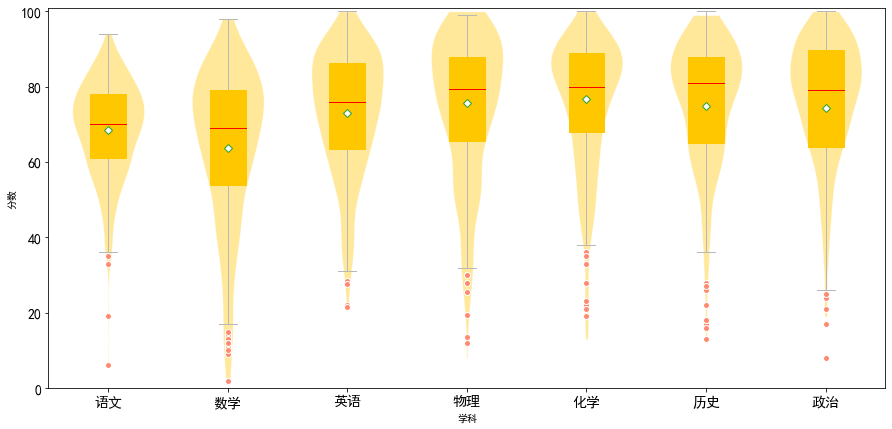

In [44]:
# 索引
subject_index = subject2020_yw_data_violin.index.to_list()

# 准备  boxplot 数据
subject2020_yw_data = subject2020_yw_data.iloc[:, 0]
subject2020_sx_data = subject2020_sx_data.iloc[:, 1]
subject2020_yy_data = subject2020_yy_data.iloc[:, 2]
subject2020_wl_data = subject2020_wl_data.iloc[:, 3]
subject2020_hx_data = subject2020_hx_data.iloc[:, 4]
subject2020_ls_data = subject2020_ls_data.iloc[:, 5]
subject2020_df_data = subject2020_df_data.iloc[:, 6]

# 调 生成图方法

data_plt(index_ls=subject_index,
         violin_list=[
             subject2020_yw_data_violin, subject2020_sx_data_violin,
             subject2020_yy_data_violin, subject2020_ls_data_violin,
             subject2020_df_data_violin, subject2020_hx_data_violin,
             subject2020_wl_data_violin
         ],
         boxplot_list=[
             subject2020_yw_data, subject2020_sx_data, subject2020_yy_data,
             subject2020_ls_data, subject2020_df_data, subject2020_hx_data,
             subject2020_wl_data
         ])
print()

# test

In [33]:
data,data_violin = read_file(file_path='C:/Users/caozhiqiang/Desktop/考试数据分析/理工附中期中数据/数据整理/【2020-2021学年第一学期初三期中考试】过程线标记颜色汇总.xlsx',sheet_name='Sheet4')

In [39]:
data_violin

学籍号,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
数学,83.5,23.5,72.0,58.0,55.0,49.5,61.5,84.0,72.0,65.0,86.0,87.0,66.5,14.0,73.5,75.5,73.0,68.5,43.0,60.5,82.5,79.5,86.5,69.0,82.5,72.5,74.0,18.0,70.5,75.0,23.5


In [35]:
ls_index = data_violin.index.to_list()
ls_index

['数学']

In [40]:
data = data.iloc[:, 0]


({'bodies': [<matplotlib.collections.PolyCollection at 0x1de47cb8a60>]},
 {'whiskers': [<matplotlib.lines.Line2D at 0x1de482f4940>,
  'caps': [<matplotlib.lines.Line2D at 0x1de482fe040>,
  'boxes': [<matplotlib.patches.PathPatch at 0x1de482f45e0>],
  'medians': [<matplotlib.lines.Line2D at 0x1de482fe700>],
  'fliers': [<matplotlib.lines.Line2D at 0x1de482fed60>],
  'means': [<matplotlib.lines.Line2D at 0x1de482fea00>]})

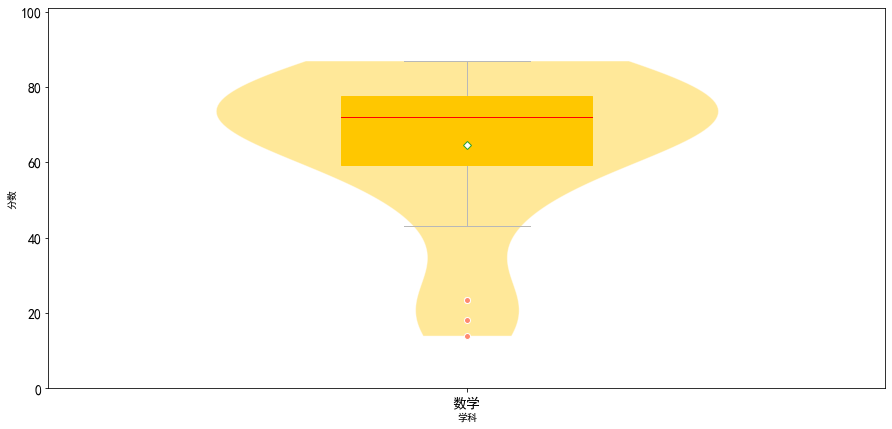

In [45]:
violin = data_plt(index_ls=['数学'],violin_list=[data_violin], boxplot_list=[data])
violin

In [59]:
violin[1]

{'whiskers': [<matplotlib.lines.Line2D at 0x1de482f4940>,
 'caps': [<matplotlib.lines.Line2D at 0x1de482fe040>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1de482f45e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de482fe700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de482fed60>],
 'means': [<matplotlib.lines.Line2D at 0x1de482fea00>]}